In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

from Experiment import Experiment2D
from figure_functions import get_plot_options, loss_boxplot

In [6]:
# Set the plotting options for matplotlib:
full_params, half_params = get_plot_options()

# Use either the half_params or full_params dictionary for 
# full-width or half-width figures, respectively
plot_params = half_params.copy()

# Make customizations here:
plot_params['figure.figsize'] = (5, 2)

# Reset to the defaults, then update rcparams to plot_params dictionary of options:
plt.rcdefaults()
plt.rcParams.update(plot_params)

In [3]:
# Load up the different experiments for analysis
expt = Experiment2D(experiment_name="Sys3-Paper-Experiment", data_file_prefix='S3-NLP')

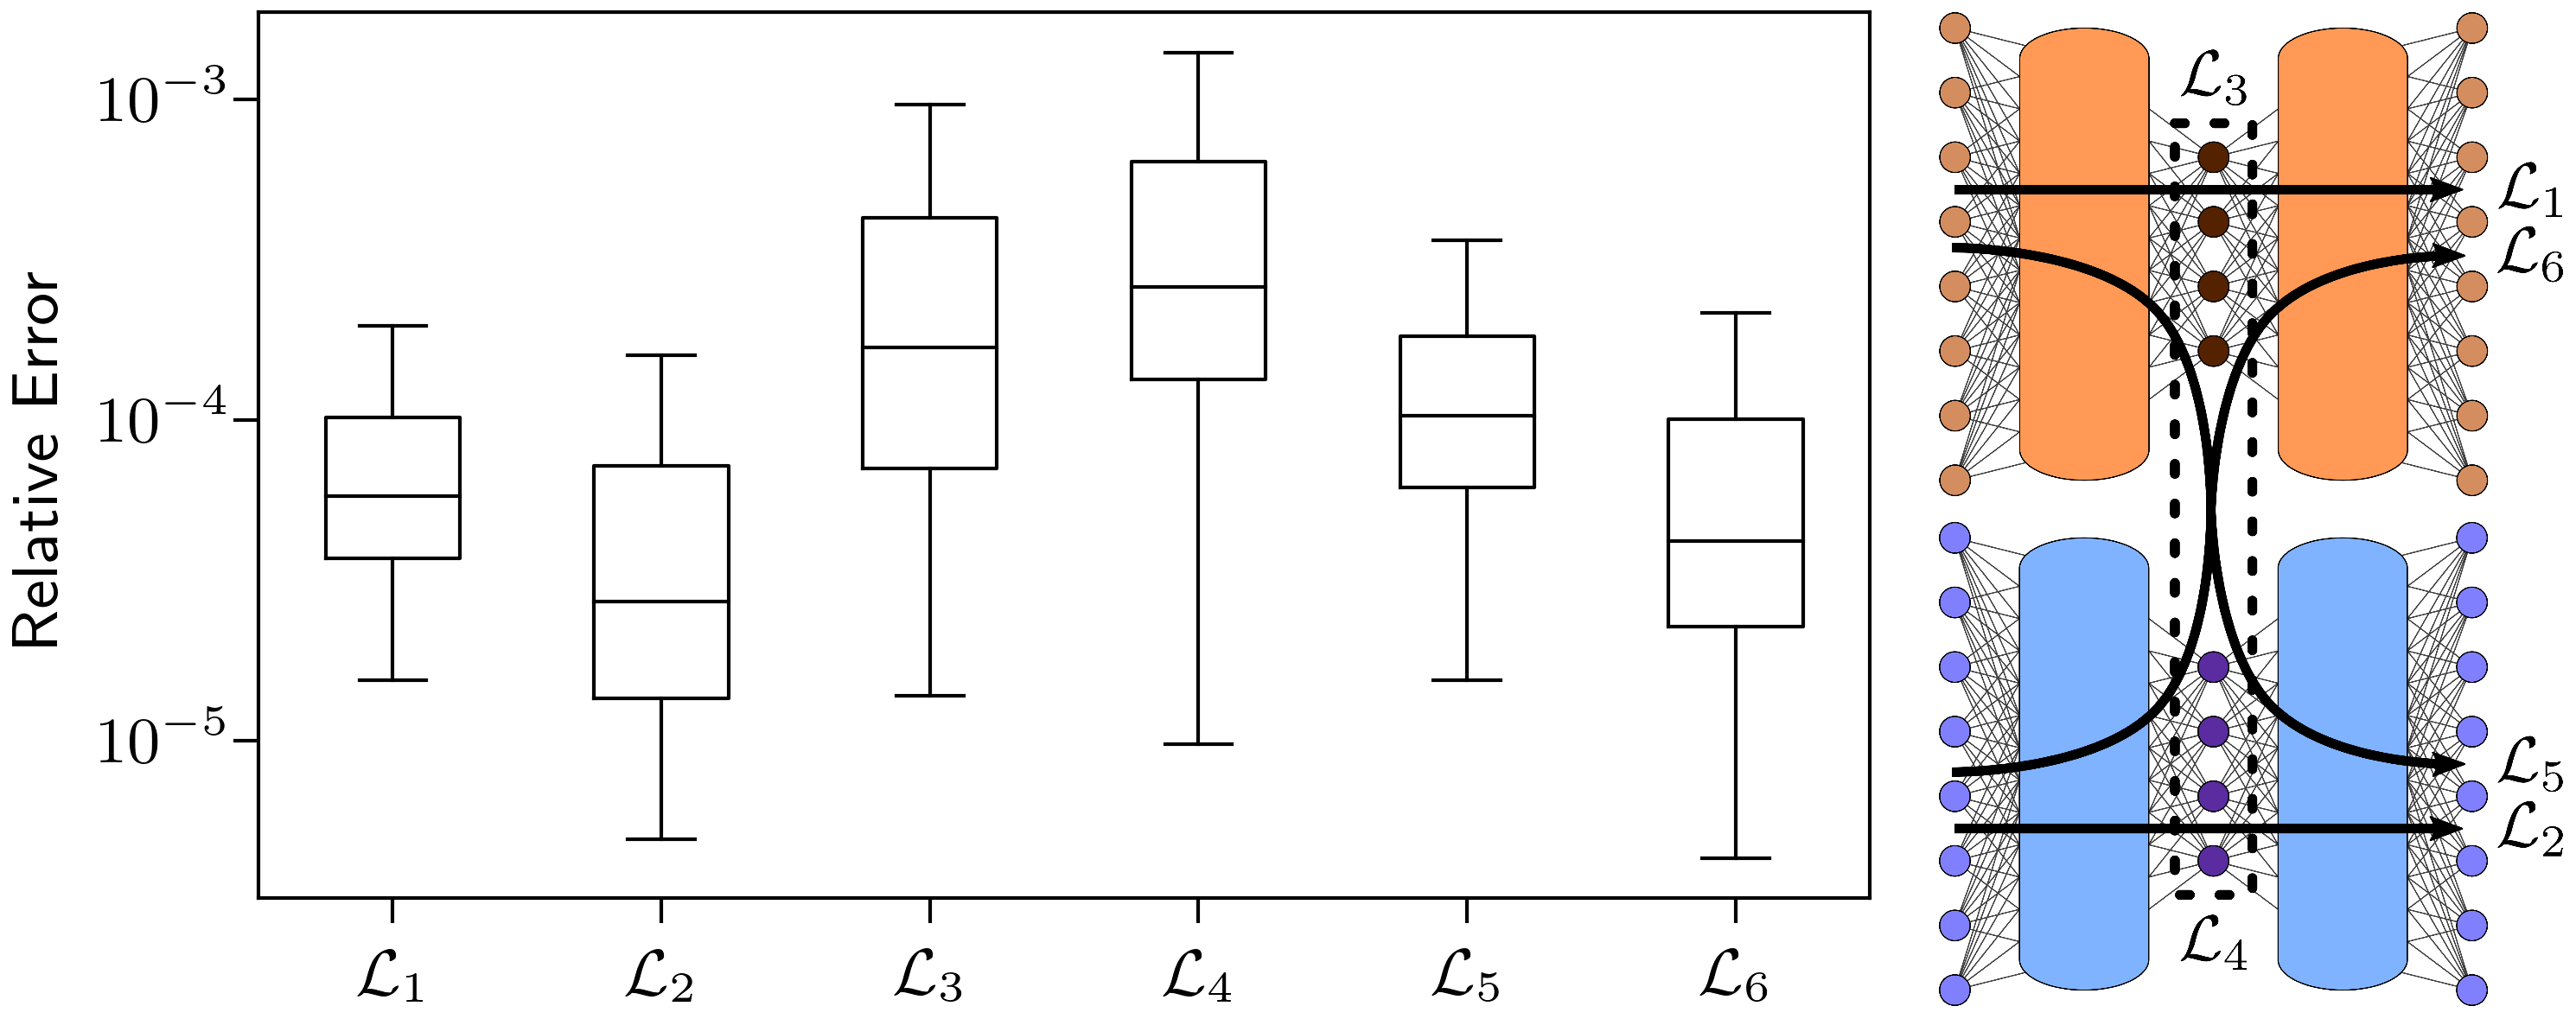

In [7]:
# Configure the subplots
fig = plt.figure(constrained_layout=True)

# Manually configure axes sizings
gridspec_kw={'wspace':-0.3, 'width_ratios':[1,0.4], 'height_ratios':[1,0.5]}
gs = GridSpec(2, 2, figure=fig, **gridspec_kw)
# Define axes from above grid
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[:, 1], frameon=False)

# Make boxplot
loss_boxplot(expt, dataset_name='test1', ax=ax1)
# Load in the loss circuit diagram
img = mpimg.imread('./figures/LossCircuits.png')
ax2.imshow(img, resample=False)
# Remove x axis and y axis, autoscale
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
plt.autoscale()  # autoscale seems to reduce the amount that the right loss image is cut off at the top. 

# Save and show the resulting plot:
plt.savefig("./figures/Fig11.png")
plt.show()